In [17]:
import easyocr
from PIL import Image
import io
import re
import pandas as pd
import psycopg2

In [ ]:
reader = easyocr.Reader(['en'])
image_path = "C:\\Users\\Saravanan\\OneDrive\\Desktop\\Bizcard\\1.png"
result = reader.readtext(image_path)
result

In [ ]:

reader = easyocr.Reader(['en'], gpu=False)
image_path = "C:\\Users\\Saravanan\\OneDrive\\Desktop\\Bizcard\\1.png"
image_data = reader.readtext(image_path, detail = 0)
image_data

In [6]:
image = Image.open(image_path)
# Convert RGBA image to RGB
image = image.convert('RGB')

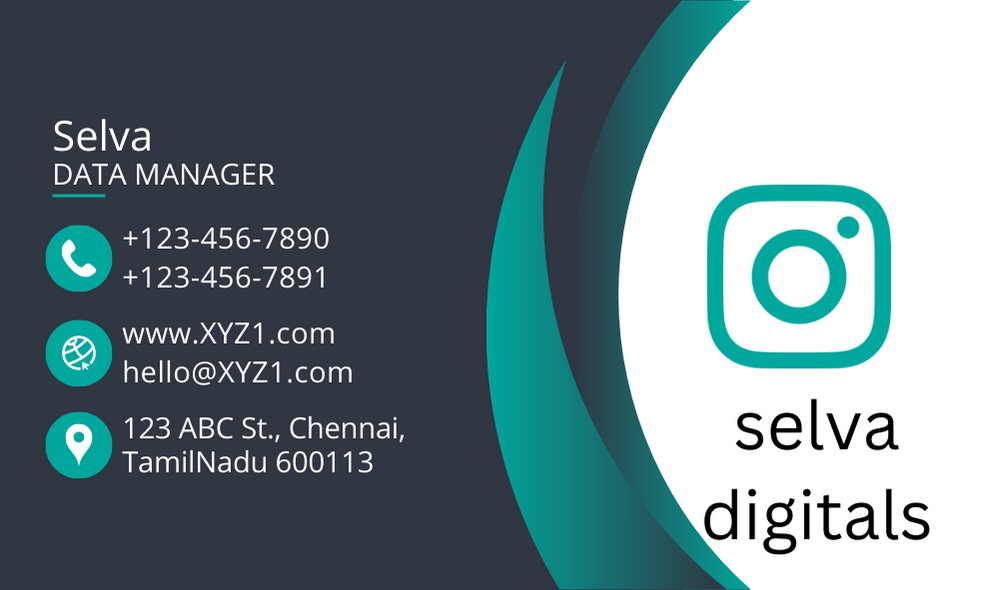

In [7]:
image

In [8]:
# Convert the image to binary data
def img_to_binary(image):
    image_binary = io.BytesIO()
    image.save(image_binary, format='JPEG')
    image_binary = image_binary.getvalue()
    return image_binary

In [9]:
details =[]
for i in range(len(result)):
    details.append(result[i][1])
name = []
designation = []
contact =[]
email =[]
website = []
street =[]
city =[]
state =[]
pincode=[]
company =[]

In [10]:
details

['Selva',
 'DATA MANAGER',
 '+123-456-7890',
 '+123-456-7891',
 'WWW XYZI.com',
 'hello@XYZ1.com',
 '123 ABC St , Chennai;',
 'selva',
 'TamilNadu 600113',
 'digitals']

In [11]:
image_data

['Selva',
 'DATA MANAGER',
 '+123-456-7890',
 '+123-456-7891',
 'WWW XYZI.com',
 'hello@XYZ1.com',
 '123 ABC St , Chennai;',
 'selva',
 'TamilNadu 600113',
 'digitals']

In [100]:
import re

def extracted_text(details, image_path):
    image = Image.open(image_path)
    
    data = {
        "name": [],
        "designation": [],
        "contact": [],
        "email": [],
        "website": [],
        "address": [],
        "city": [],
        "state": [],
        "pincode": [],
        "company": [],
        "image" : image
    }

    for i in range(len(details)):
        match1 = re.findall('([0-9]+ [A-Z]+ [A-Za-z]+)., ([a-zA-Z]+). ([a-zA-Z]+)', details[i])
        match2 = re.findall('([0-9]+ [A-Z]+ [A-Za-z]+)., ([a-zA-Z]+)', details[i])
        
        match4 = re.findall('([A-Za-z]+) ([0-9]+)', details[i])
        match5 = re.findall('([0-9]+ [a-zA-z]+)', details[i])
        match7 = re.findall('([0-9]+)', details[i])
        
        if i == 0:
            data["name"].append(details[i])
        elif i == 1:
            data["designation"].append(details[i])
        elif '-' in details[i]:
            data["contact"].append(details[i])
        elif '@' in details[i]:
            data["email"].append(details[i])
        elif "www " in details[i].lower() or "www." in details[i].lower():
            data["website"].append(details[i])
        elif "WWW" in details[i]:
            data["website"].append(details[i] + "." + details[i+1])
        elif match1:
            data["street"].append(match1[0][0])
            data["city"].append(match1[0][1])
            data["state"].append(match1[0][2])
        elif match2:
            data["address"].append(match2[0][0])
            data["city"].append(match2[0][1])
        elif match4:
            data["state"].append(match4[0][0])
            data["pincode"].append(match4[0][1])
        elif match5:
            data["street"].append(match5[0] + ' St,')
        elif match7:
            data["pincode"].append(match7[0])
        else:
            data["company"].append(details[i])
    
    data["contact"] = [" & ".join(data["contact"])]
    # Join company names with comma and space
    data["company"] = [" ".join(data["company"])]
    return data


In [101]:
data = extracted_text(details,image_path)
data

{'name': ['Selva'],
 'designation': ['DATA MANAGER'],
 'contact': ['+123-456-7890 & +123-456-7891'],
 'email': ['hello@XYZ1.com'],
 'website': ['WWW XYZI.com'],
 'address': ['123 ABC St'],
 'city': ['Chennai'],
 'state': ['TamilNadu'],
 'pincode': ['600113'],
 'company': ['selva digitals'],
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1004x590>}

In [110]:
df = pd.DataFrame(data)
df

name   designation                        contact           email  \
0  Selva  DATA MANAGER  +123-456-7890 & +123-456-7891  hello@XYZ1.com   

        website     address     city      state pincode         company  \
0  WWW XYZI.com  123 ABC St  Chennai  TamilNadu  600113  selva digitals   

                                               image  
0  <PIL.PngImagePlugin.PngImageFile image mode=RG...

In [20]:
import psycopg2

In [93]:
mydb = psycopg2.connect(host='localhost', user='postgres', password='123456', database='bizcard', port=5432)
cursor = mydb.cursor()

In [107]:
def details_table():
    try:
        create_table_query = """
        CREATE TABLE IF NOT EXISTS your_table (
            name VARCHAR(255),
            designation VARCHAR(255),
            contact VARCHAR(255),
            email VARCHAR(255),
            website VARCHAR(255),
            address VARCHAR(255),
            city VARCHAR(255),
            state VARCHAR(255),
            pincode VARCHAR(255),
            company VARCHAR(255),
           
        );
        """
        cursor.execute(create_table_query)

    # Inserting each row into the database
        for index, row in df.iterrows():
            insert_query = '''
            INSERT INTO your_table (name, designation, contact, email, website, address, city, state, pincode, company, image_data) 
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            '''
            cursor.execute(insert_query, (row['name'], row['designation'], row['contact'], row['email'], row['website'], row['address'], 
                                        row['city'], row['state'], row['pincode'], row['company']))
            
        # Commit the transaction
        mydb.commit()

    except Exception as e:
        print("Error:", e)
        # Rollback the transaction if an exception occurs
        mydb.rollback()


In [109]:
a=details_table()
a

Error: cursor already closed


In [116]:
"""select * from image"""

'select * from image'

In [117]:
import psycopg2
client=psycopg2.connect(host='localhost',user='postgres',password='123456',database='bizcard',port=5432)
access=client.cursor()
print("Before Update")
access.execute("""select * from image""")
x=access.fetchall()
for i in x:
    print(i)
access.execute("update image set name=input() where city='Chennai'")
client.commit()

Before Update
('Selva', 'DATA MANAGER', '+123-456-7890 & +123-456-7891', 'hello@XYZ1.com', 'WWW XYZI.com', '123 ABC St', 'Chennai', 'TamilNadu', '600113', 'selva digitals', <memory at 0x0000020762AF77C0>)


UndefinedFunction: function input() does not exist
LINE 1: update image set name=input() where city='Chennai'
                              ^
HINT:  No function matches the given name and argument types. You might need to add explicit type casts.
